# Chapter 2 Linear Regression
**Contents**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
training = {"Training instance": [1,2,3,4,5],"Diameter (in inches)":[6,8,10,14,18], "Price (in dollars)":[7,9,13,17.5,18]}
df = pd.DataFrame(training, index = None)
df

,Training instance,Diameter (in inches),Price (in dollars)
0,1,6,7.0
1,2,8,9.0
2,3,10,13.0
3,4,14,17.5
4,5,18,18.0


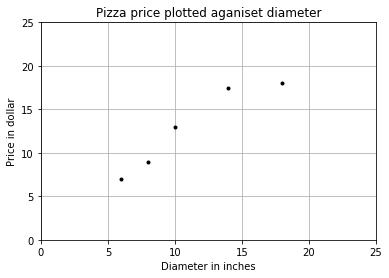

In [3]:
x = [[6], [8] , [10], [14] ,[18]]
y =[[7] ,[9] ,[13] ,[17.5] ,[18]]
plt.figure()
plt.title("Pizza price plotted aganiset diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollar")
plt.plot(x, y ,"k.")
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

## Simple linear regression

In [4]:
# Simple linear regression with one value of train and one value of prediction
# print(x) --> [[6], [8], [10], [14], [18]]
# print(y) --> [[7], [9], [13], [17.5], [18]]

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x, y)
y_pred = reg.predict([[12]])
print("intercept", reg.intercept_[0].round(4))
print("coefficient", reg.coef_[0][0].round(4))
y_pred.round(2)[0]

intercept 1.9655
coefficient 0.9763


array([13.68])

***y = a + βx***
* best fitting model is called ordinary least squares or linear least squares

***How can we assess which parameters produced the best-fitting regression line?***
- A cost function, also called a loss function, is used to define and measure the error of a model
- The differences between the prices predicted by the model and the observed prices of the pizzas in the **training** set are called residuals or training errors
- the differences between the predicted and observed values in the test data are called **prediction** errors or test errors.


In [6]:
print("Residual sum of squares", np.mean(((y - reg.predict(x))**2)).round(2))

Residual sum of squares 1.75


## Solving ordinary least squares for simple linear regression manually
- We will solve β first. To do so, we will calculate the variance of x and covariance of x and y.

* Calculate the variance

In [7]:
# from __future__ import division
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2 + (18 - xbar)**2) / 4
print("x mean: ", xbar, "variance: ", variance)
#Mean using numpy
mean = np.var([6,8,10,14,18], ddof = 1)

x mean:  11.2 variance:  23.2


* Calculate the covariance and solve coefficient **β** and intercept **a**

In [8]:
xbar = (6 + 8 + 10 + 14 + 18) / 5 #x mean
ybar = (7.0 + 9.0+ 13.0 + 17.5 + 18.0) / 5 #y mean
cov =(( 6 - xbar)*(7.0 - ybar) + (8 - xbar)*(9.0 - ybar) + (10 - xbar)*(13.0 - ybar) + (14 - xbar)*(17.5 - ybar) + \
(18 - xbar)*(18.0 - ybar) )/4 #covariance
#covariance using numpy
covariance = np.cov([6,8,10,14,18],[7.0,9.0,13.0,17.5,18.0])[0][1] #same as cov
β = covariance / variance #Coefficient
a = ybar - β * xbar #Intercept

***Simple linear regression equation y = a - βx***

In [9]:
print("intercept a:", a.round(4), "Coefficient β:", β.round(4), "Manually")
print("intercept:",reg.intercept_[0].round(4), "coefficient: ", reg.coef_[0][0].round(4), "By our model")

intercept a: 1.9655 Coefficient β: 0.9763 Manually
intercept: 1.9655 coefficient:  0.9763 By our model


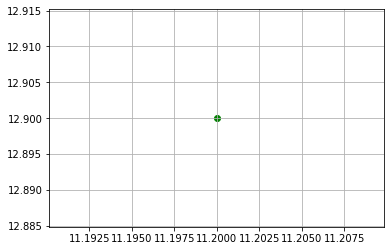

In [10]:
#the xbar and ybar centroid
plt.scatter(xbar, ybar, color ='g')
plt.grid(True)

## Evaluate the model
- Assess: verb 1. to calculate an amount to be paid
- R-squared measures how well the observed values of the response variables are predicted by the model

In [11]:
test ={"Training instance": [1,2,3,4,5],"Diameter (in inches)":[8, 9, 11, 16, 12],
       "Price (in dollars)":[11, 8.5, 15, 18, 11]}
dftest = pd.DataFrame(test)
# dftest

In [12]:
predicted_price = pd.DataFrame({"Pridicted price (in dollars)": [9.7759, 10.7522, 12.7048, 17.5863, 13.6811]})
# predicted_price

**Calculate r_squared manually**
- **intuition** 'N' thinking of something or knowing something naturally, without it being explained

In [13]:
y_mean = (11 + 8.5 + 15 + 18 + 11) / 5
y_variance = ((11 - y_mean)**2 + (8.5 - y_mean)**2 + (15 - y_mean)**2 + (18 - y_mean)**2 + (11 - y_mean)**2)
y_residuals = ((11 - 9.7759)**2 + (8.5 - 10.7522)**2 + (15 - 12.7048)**2 + (18 - 17.5863)**2 + (11 - 13.6811)**2)
r_squared = 1 - (y_residuals / y_variance)
print("An R-squared mannaully is: ",r_squared)

An R-squared mannaully is:  0.6620032818661972


In [14]:
#Calculate r_squared using scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = [[6],[8],[10],[14],[18]]
y =[[7],[9],[13],[17.5],[18]]
x_test = [[8],[9],[11],[16],[12]]
y_test = [[11],[8.5],[15],[18],[11]]
tested_model = model.fit(x, y)
print("Model score (r_squared):", tested_model.score(x_test, y_test).round(5))

Model score (r_squared): 0.66201


## Multiple linear regression
<img src="images\simple to multiple linear regression.jpg"  width ="250"></img>
- m is the number of training examples and n is the number of explanatory variables

***y = a  + βx1 + βx2 +....+ βxn***

In [15]:
#---Training Frame
training2 = {"Training instance": [1,2,3,4,5],"Diameter (in inches)":[6,8,10,14,18], "Number of toppings":[2,1,0,2,0],
             "Price (in dollars)":[7,9,13,17.5,18]}
df2 = pd.DataFrame(training2)
#---------------------------------------TEST Frame
test2 ={"Training instance": [1,2,3,4,5],"Diameter (in inches)":[8, 9, 11, 16, 12],"Number of toopings":[2,0,2,2,0],
       "Price (in dollars)":[11, 8.5, 15, 18, 11]}
df_test2 = pd.DataFrame(test2)

***find β which minimize cost function***
- β = (X^TX)^-1 X^TY

In [16]:
from numpy import dot, transpose
from numpy.linalg import inv, lstsq
x = [[1,6,2], [1,8,1], [1,10,0], [1,14,2], [1,18,0]]
y = [[7],[9],[13],[17.5],[18]]
# dot(inv(dot(transpose(x), x)), dot(transpose(x),y))
print("by numpy in one code:\n", lstsq(x,y, rcond=None)[0])

by numpy in one code:
 [[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [17]:
#find B in more detailed
x_squared = dot(transpose(x), x)
inversed_x = inv(x_squared)
xy_transpose = dot(transpose(x), y)
coef_B = dot(inversed_x , xy_transpose)

In [18]:
from sklearn.linear_model import LinearRegression
#---init model
m_reg = LinearRegression()
x = [[6,2], [8,1], [10,0],[14,2],[18,0]]
y = [[7],[9],[13],[17.5],[18]]
m_reg.fit(x,y)
#------------------------TEST data
x_test = [[8,2], [9,0],[11,2],[16,2],[12,0]]
y_test = [[11],[8.5],[15],[18],[11]]
#---prediction
m_reg_prediction =  m_reg.predict(x_test)
for i, predicted in enumerate(m_reg_prediction):
    print("Predicted:", predicted[0].round(2) , "Target:", y_test[i][0])
print("R-sauared: ",m_reg.score(x_test, y_test).round(3))

Predicted: 10.06 Target: 11
Predicted: 10.28 Target: 8.5
Predicted: 13.09 Target: 15
Predicted: 18.15 Target: 18
Predicted: 13.31 Target: 11
R-sauared:  0.77


* multiple linear regression model performs significantly better than the simple linear regression model.

## Polynomial linear regression
***Quadratic Regression: y = a + bx + bx^2***

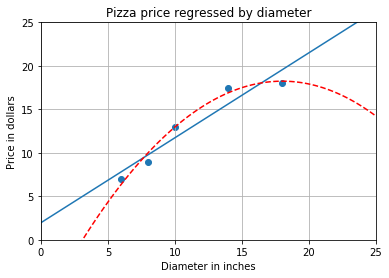

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#intialize data
x_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
x_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

#Simple linear regression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

#Plynomial regression
qudratic_featurizer = PolynomialFeatures(degree = 2)
x_train_qudratic = qudratic_featurizer.fit_transform(x_train)
x_test_qudratic = qudratic_featurizer.fit_transform(x_test)
#---------by LinearRegression
regressor_qudratic = LinearRegression()
regressor_qudratic.fit(x_train_qudratic, y_train)
xx_qudratic = qudratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
#---------matplotlib
plt.plot(xx, regressor_qudratic.predict(xx_qudratic), c='r', linestyle="--")
plt.title("Pizza price regressed by diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.axis([0, 25, 0 , 25])
plt.grid(True)
plt.scatter(x_train, y_train)
plt.show()

#Model performance by calculate it`s score
# print(x_train)
# print(x_train_qudratic)
# print(x_test)
# print(x_test_qudratic)
# print("Simple linear regression r_squared score: ", regressor.score(x_test, y_test).round(4))
# print("Ploynomial regression r_squared score: ", regressor_qudratic.score(x_test_qudratic, y_test).round(4))

* If polynomial in dgree 9 then it memorize all training data and fails to learn real relationship between size and price this is called **over-fitting**.
* the model should induce a general rule to map inputs to outputs, instead it hase memorized the inputs and outputs from training data.
    - **induce** verb 1. to persuade someone to do something.
* the R_squared is -0.094.
<img src="images\ninth degree.jpg"  width ="250"></img>

## Regularization
- Regularization is a collection of techniques that can be used to prevent over-fitting.

- scikit-learn provides several regularized linear regression models.
    * **Ridge regression**, also known as **Tikhonov regularization**.
        -  Ridge regression modifies the residual sum of the squares cost function by adding the L2 norm of the coefficients.
        <img src="images\ridge regression.jpg"  width ="250"></img>
    * Least Absolute Shrinkage and Selection Operator **(LASSO)**
         - LASSO penalizes the coefficients by adding their L1 norm to the cost function.
         <img src="images\lasso.jpg"  width ="250"></img>

## Appling Linear Regression

In [20]:
import pandas as pd

df = pd.read_csv("datasets\winequality-red.csv", sep = ";")
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


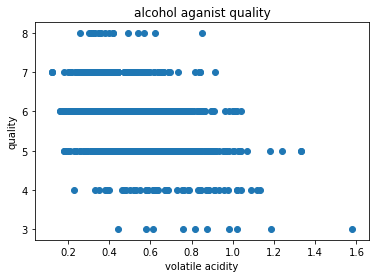

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df["volatile acidity"],df["quality"])
plt.title("alcohol aganist quality")
plt.xlabel("volatile acidity")
plt.ylabel("quality")
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df = pd.read_csv("datasets\winequality-red.csv", sep = ";")
X = df[list(df.columns)[:-1]]
# x = df.iloc[:,:-1] the same code as above
y = df["quality"]

x_train, x_test, y_train, y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)
print("Linear model scores: ", model.score(x_test, y_test).round(5))

#Usinf cross validation to split data
score = cross_val_score(model, X, y, cv=5)
print("corss val score: ",score.mean().round(5), score)

Linear model scores:  0.38008
corss val score:  0.29004 [0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]


## Fitting model using gradient descent
- **Batch gradient descent**, which is sometimes called only gradient descent, uses all of the training instances to update the model parameters in each iteration.
- **Stochastic Gradient Descent (SGD)**, in contrast, updates the parameters using only a single training instance in each iteration.

In [1]:
#SGD
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = load_boston()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

x_scaler = StandardScaler()
# y_scaler = StandardScaler()

x_train = x_scaler.fit_transform(x_train)
# y_train = y_scaler.fit_transform(y_train)

# x_test = x_scaler.transform(x_scaler)
# y_test = y_scaler.transform(y_test)

regressor = SGDRegressor(loss="squared_loss")
score = cross_val_score(regressor, x_train, y_train, cv = 5)
print("cross val r_squared score : ",score)
print("average cross val score: ", np.mean(score))
# regressor._fit_regressor(x_train, y_train)
# print("SGD Test regressor score: ",regressor.score(x_test, y_test))

cross val r_squared score :  [0.5017475  0.73664154 0.71892329 0.75975155 0.74888258]
average cross val score:  0.6931892924863853


# End Chapter